In [ ]:
# From http://dsp.stackexchange.com/questions/18515/how-to-recover-complex-values-downconvert-from-fm-modulation-composite-signal

In [1]:
# Import the plotting library
from matplotlib import pyplot as plt
import scipy.signal
import numpy as np
%matplotlib inline

In [2]:
# Define the setup
fCarrier = 10;
fAudio = 1;
fs = 1000;
timeEnd = 1;
time = np.linspace(0,2,fs*timeEnd);

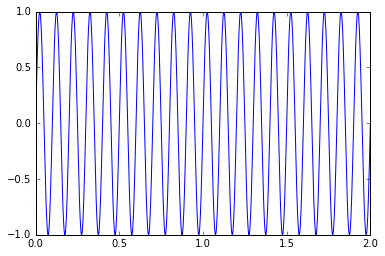

In [3]:
# Create the signals
carrier = np.sin(2*np.pi*fCarrier*time);
plt.plot(time,carrier)

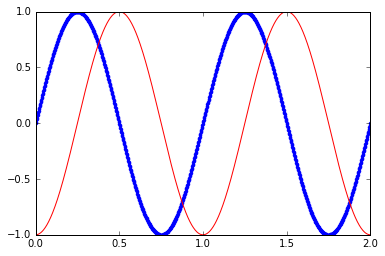

In [4]:
audio = np.sin(2*np.pi*fAudio*time);
audioInt = -np.cos(2*np.pi*fAudio*time);
plt.plot(time,audio,'b.')
plt.plot(time,audioInt,'r-')

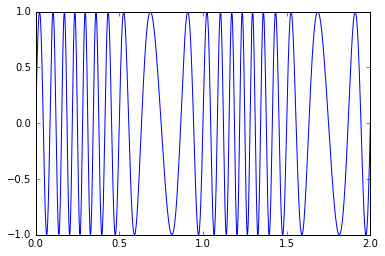

In [5]:
freqMod = np.sin(2*np.pi*fCarrier*time + 2*np.pi*1*audioInt)
plt.plot(time,freqMod)

In [6]:
# Downconvert using hilbert transform prior to FM demodulation
analyticSignal = scipy.signal.hilbert(freqMod); # wikipedia analytic signal
baseband = analyticSignal * np.exp(-2*np.pi*fCarrier*time*1j); # complex mixing
audioDemod = np.angle( baseband[1::1] * np.conjugate(baseband[0:-1:1]) ); # fm demod

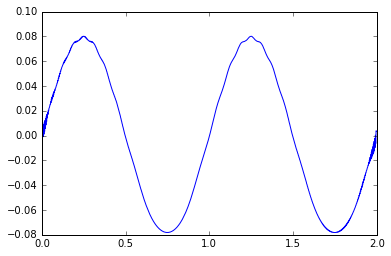

In [7]:
plt.plot(time[0:-1], audioDemod)